# Diciembre 16
## Temario
- Manipulación de Datos
- Limpieza de Datos
- Introducción a la Regresión Lineal

### Datos

In [5]:
import pandas as pd
import numpy as np

In [3]:
data = {
    "nombre": ["Ana", "Juan", "Pedro", "Maria", "Luis", None],
    "edad": [23, 35, None, 29, 41, 30],
    "ciudad": ["CDMX", "cdmx", "Monterrey ", "GDL", "  gdl", "CDMX"],
    "ingresos": ["$12,000", "$18,500", "$15,300", None, "$22000.", "$17800."]
    }

## Manipulación de Datos

In [6]:
# Nota: para importar un .csv se usa el: variable = pd.read_csv("NombreArchivo.csv")
df = pd.DataFrame(data)
df

,nombre,edad,ciudad,ingresos
0,Ana,23.0,CDMX,"$12,000"
1,Juan,35.0,cdmx,"$18,500"
2,Pedro,NaN,Monterrey,"$15,300"
3,Maria,29.0,GDL,None
4,Luis,41.0,gdl,$22000.
5,None,30.0,CDMX,$17800.


### ¿Qué es un Data Frame?
Es una tabla de datos: filas (registros) y columnas (variables).

In [7]:
# Exploración de los Datos
df.head()

,nombre,edad,ciudad,ingresos
0,Ana,23.0,CDMX,"$12,000"
1,Juan,35.0,cdmx,"$18,500"
2,Pedro,NaN,Monterrey,"$15,300"
3,Maria,29.0,GDL,None
4,Luis,41.0,gdl,$22000.


In [8]:
# Si se desea ver las columnas se puede hacer de la sig manera
df.columns

Index(['nombre', 'edad', 'ciudad', 'ingresos'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nombre    5 non-null      object 
 1   edad      5 non-null      float64
 2   ciudad    6 non-null      object 
 3   ingresos  5 non-null      object 
dtypes: float64(1), object(3)
memory usage: 324.0+ bytes


In [10]:
# Da una descripción de todos los datos
df.describe(include="all")

,nombre,edad,ciudad,ingresos
count,5,5.00000,6,5
unique,5,NaN,5,5
top,Ana,NaN,CDMX,"$12,000"
freq,1,NaN,2,1
mean,NaN,31.60000,NaN,NaN
std,NaN,6.76757,NaN,NaN
min,NaN,23.00000,NaN,NaN
25%,NaN,29.00000,NaN,NaN
50%,NaN,30.00000,NaN,NaN
75%,NaN,35.00000,NaN,NaN


In [11]:
df.columns

Index(['nombre', 'edad', 'ciudad', 'ingresos'], dtype='object')

In [12]:
df["nombre"]

,nombre
0,Ana
1,Juan
2,Pedro
3,Maria
4,Luis
5,None


In [13]:
df[df["edad"] > 30]

,nombre,edad,ciudad,ingresos
1,Juan,35.0,cdmx,"$18,500"
4,Luis,41.0,gdl,$22000.


In [14]:
print(df)
df[
    (df["edad"] > 18) &
    (df["ingresos"] != "$22,000") &
    (df["nombre"] != "Juan")

]

  nombre  edad      ciudad ingresos
0    Ana  23.0        CDMX  $12,000
1   Juan  35.0        cdmx  $18,500
2  Pedro   NaN  Monterrey   $15,300
3  Maria  29.0         GDL     None
4   Luis  41.0         gdl  $22000.
5   None  30.0        CDMX  $17800.


,nombre,edad,ciudad,ingresos
0,Ana,23.0,CDMX,"$12,000"
3,Maria,29.0,GDL,None
4,Luis,41.0,gdl,$22000.
5,None,30.0,CDMX,$17800.


In [15]:
# Uso de count(), mean(), fillna(), str.replace(), astype()
print(df["edad"].count()) # Son 6 pero 1 es None por lo mismo solo entrega 5 datos
print("-------------------------------")

print(df["edad"].mean()) # Promedio
print("-------------------------------")

print(df["edad"].sum()) # Sumna
print("-------------------------------")

print(df["nombre"].fillna("Desconocido")) # Rellena los valores con el dato que se le otorga
print("-------------------------------")

print(df["ingresos"].str.replace("$", "").str.replace(",", "").astype(float))
# str.replace remplaza x simbolo por y
# .astype(tipo_de_dato) cambia el tipo de dato de la columna

5
-------------------------------
31.6
-------------------------------
158.0
-------------------------------
0            Ana
1           Juan
2          Pedro
3          Maria
4           Luis
5    Desconocido
Name: nombre, dtype: object
-------------------------------
0    12000.0
1    18500.0
2    15300.0
3        NaN
4    22000.0
5    17800.0
Name: ingresos, dtype: float64


## Limpieza de Datos

In [16]:
df_clean = df.copy()
print(df_clean)
# Rellenar valores faltantes
df_clean["edad"] = df_clean["edad"].fillna(df_clean["edad"].mean())
df_clean["ingresos"] = df_clean["ingresos"].fillna("$0")
df_clean["nombre"] = df_clean["nombre"].fillna("Desconocido")
df_clean

  nombre  edad      ciudad ingresos
0    Ana  23.0        CDMX  $12,000
1   Juan  35.0        cdmx  $18,500
2  Pedro   NaN  Monterrey   $15,300
3  Maria  29.0         GDL     None
4   Luis  41.0         gdl  $22000.
5   None  30.0        CDMX  $17800.


,nombre,edad,ciudad,ingresos
0,Ana,23.0,CDMX,"$12,000"
1,Juan,35.0,cdmx,"$18,500"
2,Pedro,31.6,Monterrey,"$15,300"
3,Maria,29.0,GDL,$0
4,Luis,41.0,gdl,$22000.
5,Desconocido,30.0,CDMX,$17800.


In [17]:
print(df)
print(df_clean)

  nombre  edad      ciudad ingresos
0    Ana  23.0        CDMX  $12,000
1   Juan  35.0        cdmx  $18,500
2  Pedro   NaN  Monterrey   $15,300
3  Maria  29.0         GDL     None
4   Luis  41.0         gdl  $22000.
5   None  30.0        CDMX  $17800.
        nombre  edad      ciudad ingresos
0          Ana  23.0        CDMX  $12,000
1         Juan  35.0        cdmx  $18,500
2        Pedro  31.6  Monterrey   $15,300
3        Maria  29.0         GDL       $0
4         Luis  41.0         gdl  $22000.
5  Desconocido  30.0        CDMX  $17800.


In [18]:
df_clean["ciudad"] = (
    df_clean["ciudad"]
    .str.lower() # cambia a minusculas
    .str.strip() # elimina espacios
)

In [ ]:
#Ahora con los datos limpios podemos trabajar con ellos
#Ejercicio Rápido
# 1) Saca los nombre de todos
# 2) Saca los nombres de todos sin los que digan desconocidos
# 3) Saca la cantidad de personas que hay por medio de ciudad# Ahora pondremos uno un poco más dificil
# 4) Saca TODOS los datos donde no se muestre desconocido, donde no se muestren los que son de monterrey en ciudad y donde no se muestre los ingresos que sean $0
# 5) Saca la edad promedio de las personas que no son de la ciudad de cdmx que ganan mayor o igual que $10,000

In [19]:
# 1)
df_clean["nombre"]

,nombre
0,Ana
1,Juan
2,Pedro
3,Maria
4,Luis
5,Desconocido


In [20]:
# 2)
df_clean[df_clean["nombre"] != "Desconocido"]["nombre"]

,nombre
0,Ana
1,Juan
2,Pedro
3,Maria
4,Luis


In [21]:
# 3)
df_clean["ciudad"].count()

np.int64(6)

In [22]:
# 4)
df_clean[
    (df_clean["nombre"] != "Desconocido") &
    (df_clean["ciudad"] != "monterrey") &
    (df_clean["ingresos"] != "$0")
]

,nombre,edad,ciudad,ingresos
0,Ana,23.0,cdmx,"$12,000"
1,Juan,35.0,cdmx,"$18,500"
4,Luis,41.0,gdl,$22000.


In [23]:
# 5)
df_clean[(df_clean["ciudad"] != "cdmx") & (df_clean["ingresos"] != "$10,000")]["edad"].mean()

np.float64(33.86666666666667)

In [24]:
df_clean["ingresos"] = df["ingresos"].str.replace("$", "").str.replace(",", "").astype(float)
df_clean

,nombre,edad,ciudad,ingresos
0,Ana,23.0,cdmx,12000.0
1,Juan,35.0,cdmx,18500.0
2,Pedro,31.6,monterrey,15300.0
3,Maria,29.0,gdl,NaN
4,Luis,41.0,gdl,22000.0
5,Desconocido,30.0,cdmx,17800.0


## Introducción a la Regresión Lineal

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
df_clean["ingresos"] = (
    df["ingresos"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
    .fillna(0)
)
print(df_clean)

        nombre  edad     ciudad  ingresos
0          Ana  23.0       cdmx   12000.0
1         Juan  35.0       cdmx   18500.0
2        Pedro  31.6  monterrey   15300.0
3        Maria  29.0        gdl       0.0
4         Luis  41.0        gdl   22000.0
5  Desconocido  30.0       cdmx   17800.0


### ¿Qué es una regresión lineal?
Una regresión intenta predecir un valor numerico a partir de otros datos.

Ejemplo:
- Predecir ingresos segun edad
- Predecir precio segun tamaño

Aqui usaremos regresión lineal: el tipo más simple.

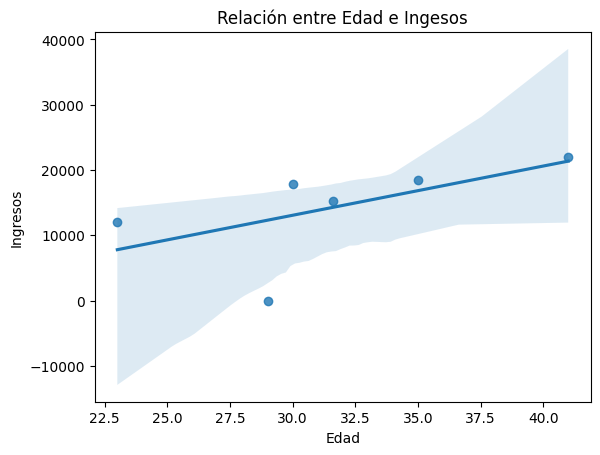

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x = df_clean["edad"], y = df_clean["ingresos"])
plt.xlabel("Edad")
plt.ylabel("Ingresos")
plt.title("Relación entre Edad e Ingesos")
plt.show()

In [28]:
# MATRIZ DE CORRELACIÓN
#df_clean.corr()
df_clean[["edad","ingresos"]].corr()

# 0.0 -> nada
# 0.3 -> debil
# 0.5 -> moderada
# >0.8 -> fuerte

,edad,ingresos
edad,1.000000,0.588779
ingresos,0.588779,1.000000


In [29]:
print(df_clean)

        nombre  edad     ciudad  ingresos
0          Ana  23.0       cdmx   12000.0
1         Juan  35.0       cdmx   18500.0
2        Pedro  31.6  monterrey   15300.0
3        Maria  29.0        gdl       0.0
4         Luis  41.0        gdl   22000.0
5  Desconocido  30.0       cdmx   17800.0


In [30]:
x = df_clean[["edad"]]
y = df_clean["ingresos"]
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

Tiene relacion con la formula de la pendiente

In [31]:
edad_nueva = [[30]]
prediccion = modelo.predict(edad_nueva)
prediccion

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13061.25181951])

In [32]:
# Podemos evaluar el modelo
from sklearn.metrics import r2_score, mean_squared_error
y_pred = modelo.predict(x) # Son los ingresos que el modelo cree segun la edad
# ingresos = β0 + β1 · edad
# β0 → intercepto
# β1 → coeficiente de edad

r2 = r2_score(y, y_pred)
# 0.3 - 0.5 aceptable, pero siempre es mejor tener un modelo 0.6 - 0.8 o muy bueno > 0.8
mse = mean_squared_error(y, y_pred)
print(r2)

# Regresión logistica suele usar -> Accuracy, Precision, F1 Score, Recall, Store

0.34666091920946085
